#Time Analysis
Use Time Series Analysis to find correlation between each location weather's behaviour

Some of the visualisation is commented out since exporting the file is currently not possible due to size limit so I commentd out a lot of Karn's plots

###Thailand location

samut_prakan
nonthaburi
chiang_mai
phuket
krabi
udon_thani
songkhla
nakhon_ratchasima
pattani
nakhon_patthom
phitsanulok
bangkok_new


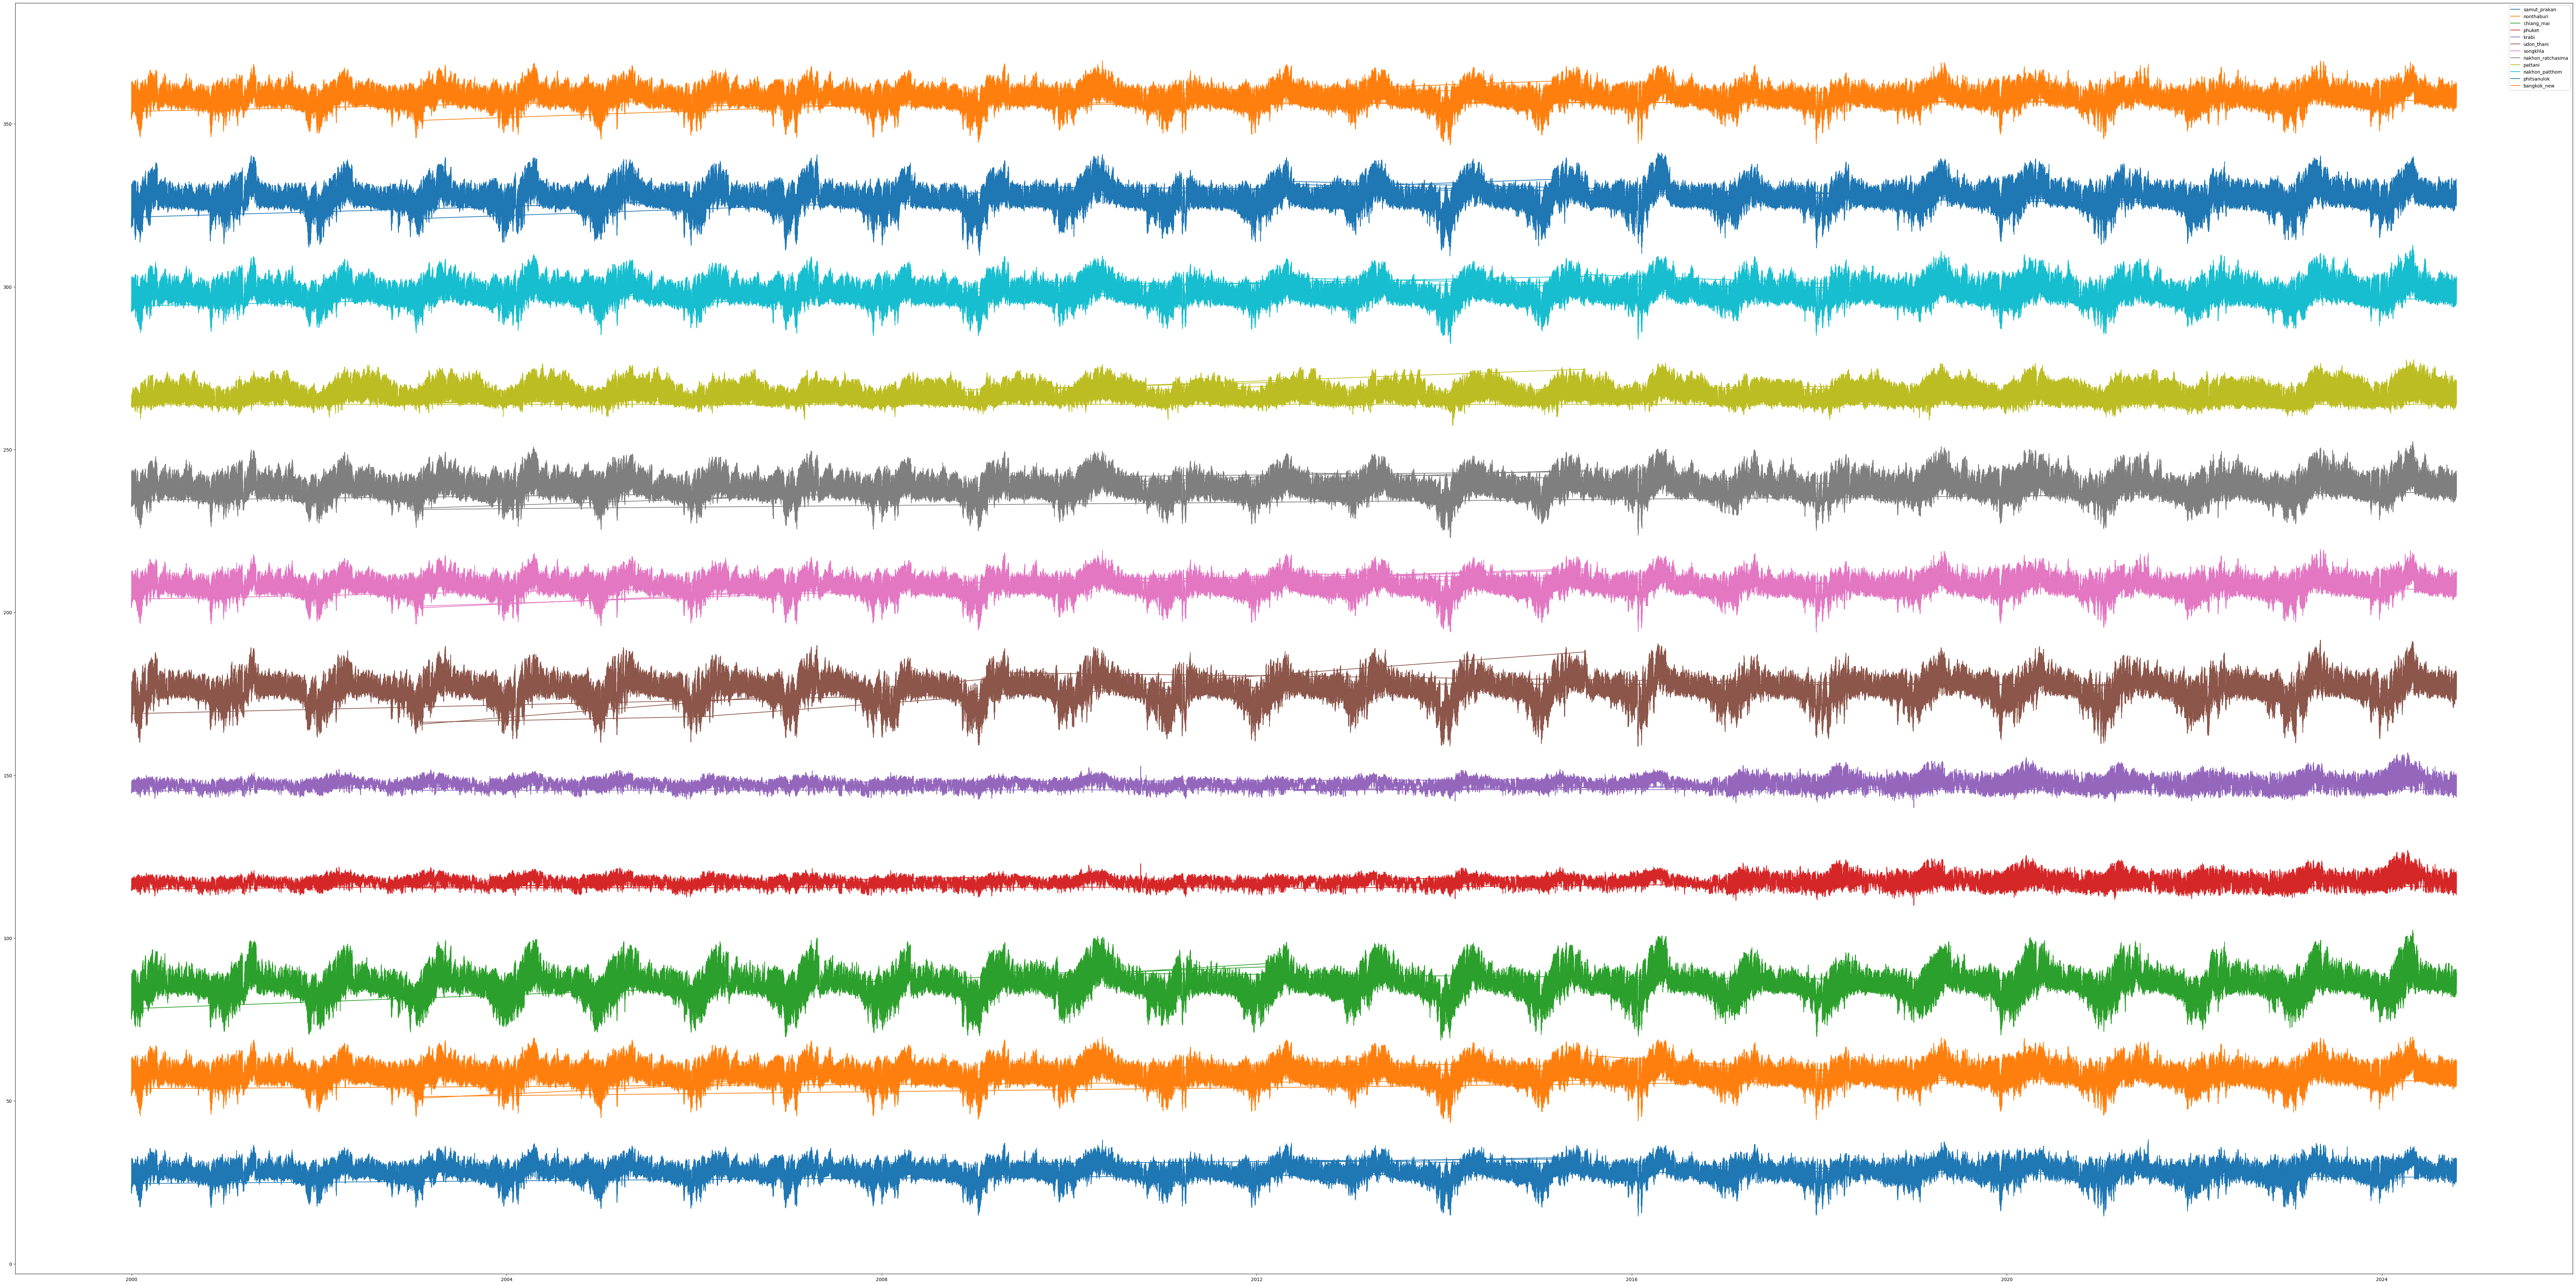

In [0]:
from matplotlib import pyplot as plt

thailand = ["samut_prakan", "nonthaburi", "chiang_mai", "phuket", "krabi", "udon_thani", "songkhla", "nakhon_ratchasima", "pattani", "nakhon_patthom","phitsanulok","bangkok_new"]

plt.figure(figsize=(100,50))

for i,ele in enumerate(thailand):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('thailand.png') 
plt.show()

looking at the graph purely, we can see there's some similarity between each location's temperature

In [0]:
import pandas as pd
import seaborn as sns
def cor(country: list, name: str,string):
    temp_corre = pd.DataFrame()
    for i,ele in enumerate(country):
        df = spark.sql(f"SELECT * FROM {ele}")
        df = df.toPandas()
        temp_corre[ele] = df[f"{name}"]
    #plt.figure(figsize=(20,20))
    plt.title(f"Pearson Correlation of {name} between cities of {string}")
    sns.heatmap(annot = True , data = temp_corre.corr() , cmap = 'coolwarm',fmt='.2f')
    plt.show()
    return temp_corre


def diff(country: list, name: str,string):
    temp_corre = pd.DataFrame()
    for i,ele in enumerate(country):
        df = spark.sql(f"SELECT {name} - coalesce(lag({name}) over (order by date), 0) as {name} FROM {ele} ORDER BY date")
        df = df.toPandas()
        temp_corre[ele] = df[f"{name}"]
    #plt.figure(figsize=(20,20))
    plt.title(f"Pearson Correlation of Change in {name} between cities of {string}")
    sns.heatmap(annot = True , data = temp_corre.corr() , cmap = 'coolwarm',fmt='.2f')
    plt.show()
    return temp_corre


def slide(df,city):
    lagged_correlation = pd.DataFrame.from_dict(
    {x: [df[city].corr(df[x].shift(-t)) for t in range(0,60)] for x in df.columns})
    plt.figure(figsize=(20,20))

    sns.heatmap(annot = True , data = lagged_correlation , cmap = 'coolwarm',fmt='.2f')
    plt.show()
    

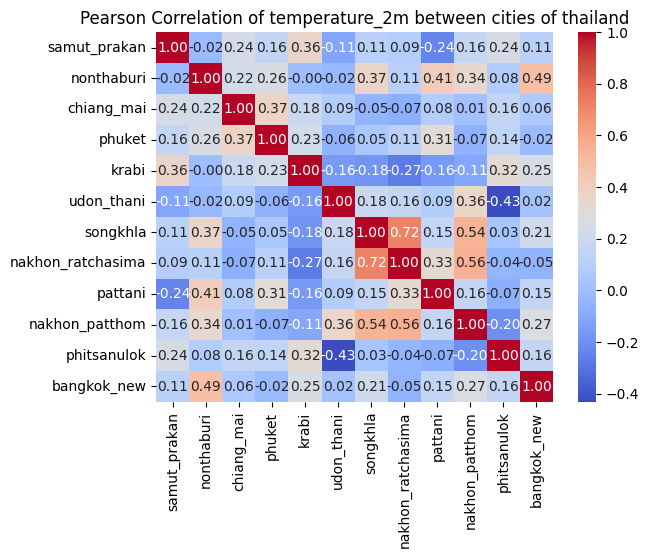

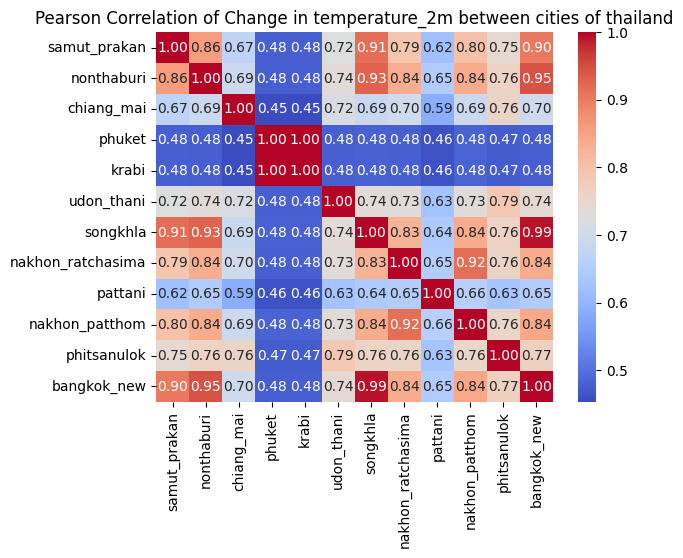

In [0]:
c1 = cor(thailand, "temperature_2m","thailand")
c2 = diff(thailand, "temperature_2m","thailand")


In [0]:
#slide(c1, "songkhla")
#slide(c2, "songkhla")

In [0]:
#plt.show()
r1 = cor(thailand, "rain","thailand")
r2 = diff(thailand, "rain","thailand")


In [0]:
#slide(r1, "songkhla")
#slide(r2, "songkhla")

In [0]:
#cloud = cor(thailand, "cloud_cover","thailand")

In [0]:
def slide2(df,city):
    lagged_correlation = pd.DataFrame.from_dict(
    {x: [df[city].corr(df[x].shift(-t)) for t in range(0,240)] for x in df.columns})
    plt.figure(figsize=(20,20))

    #sns.heatmap(annot = True , data = lagged_correlation , cmap = 'coolwarm',fmt='.2f')
    plt.show()
#slide2(cloud,"chiang_mai")

In [0]:
vietnam = ["ho_chi_minh_city",
"hanoi",
"haiphong",
"can_tho",
"bien_haa"]
plt.figure(figsize=(100,50))

for i,ele in enumerate(vietnam):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('vietnam.png') 
plt.show()

ho_chi_minh_city
hanoi
haiphong
can_tho
bien_haa


In [0]:
c1 = cor(vietnam,"temperature_2m","vietnam")
c2 = diff(vietnam,"temperature_2m", "vietnam")


In [0]:
#slide(c1,"bien_haa")
#slide(c2,"bien_haa")

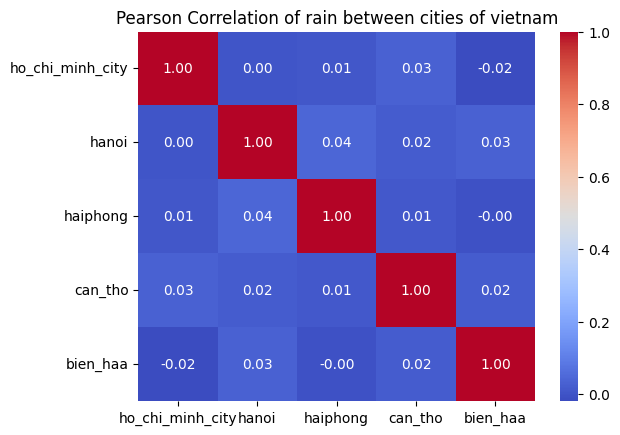

In [0]:
r1 = cor(vietnam,"rain","vietnam")
r2 = diff(vietnam,"rain","vietnam")

In [0]:
#slide(r1,"bien_haa")
#slide(r2,"bien_haa")

kuala_lumpur
seberang_jaya
klang
ipoh
george_town


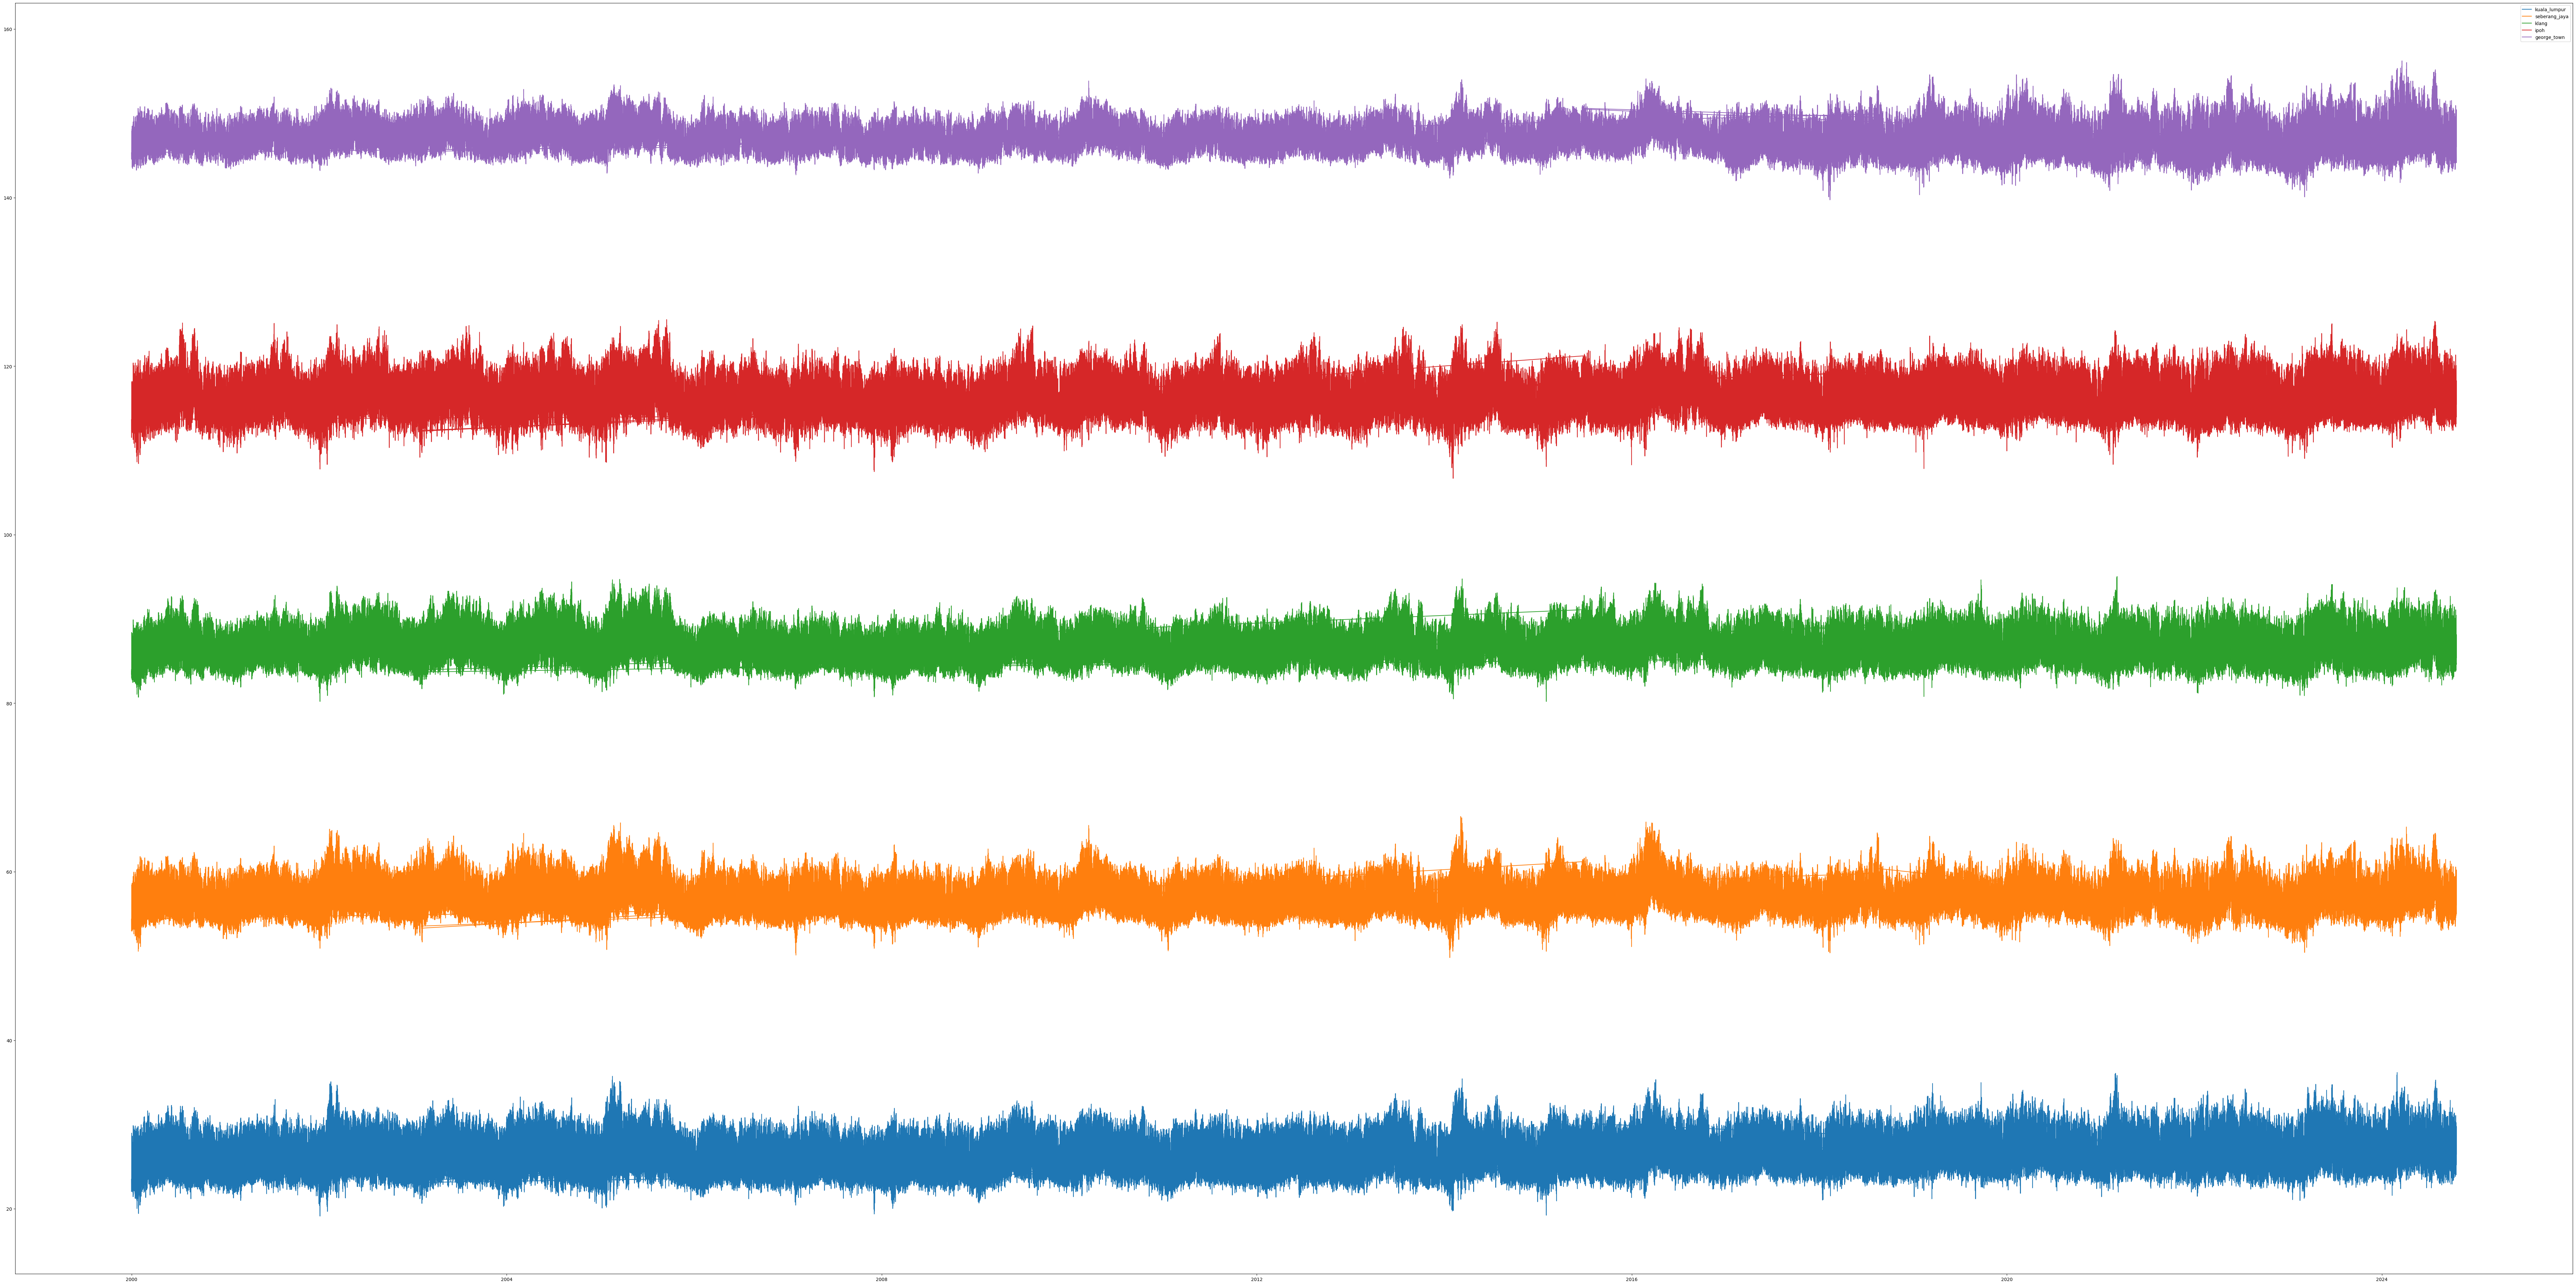

In [0]:
malaysia = ["kuala_lumpur",
"seberang_jaya",
"klang",
"ipoh",
"george_town"]

plt.figure(figsize=(100,50))

for i,ele in enumerate(malaysia):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('malaysia.png') 
plt.show()



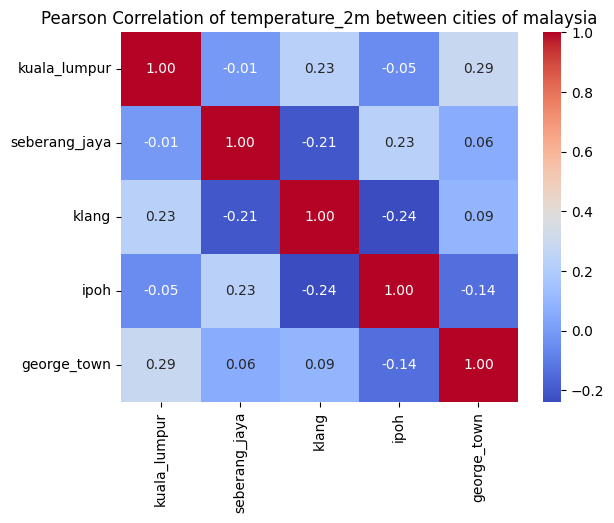

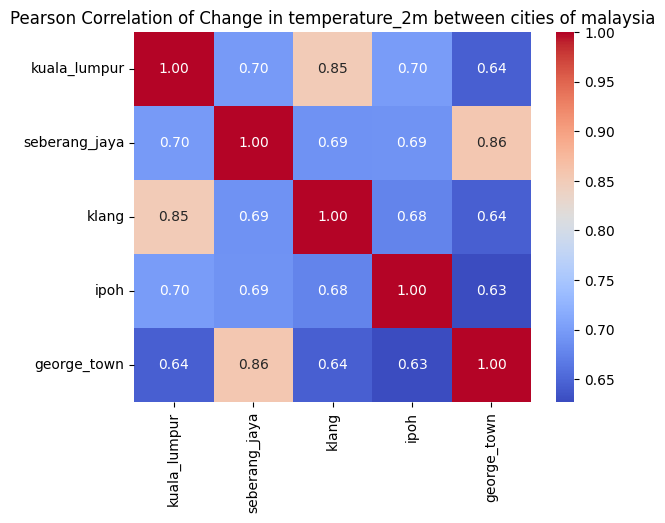

In [0]:
c1 = cor(malaysia,"temperature_2m","malaysia")
c2 = diff(malaysia,"temperature_2m","malaysia")

In [0]:
#slide(c1,"seberang_jaya")
#slide(c2,"seberang_jaya")

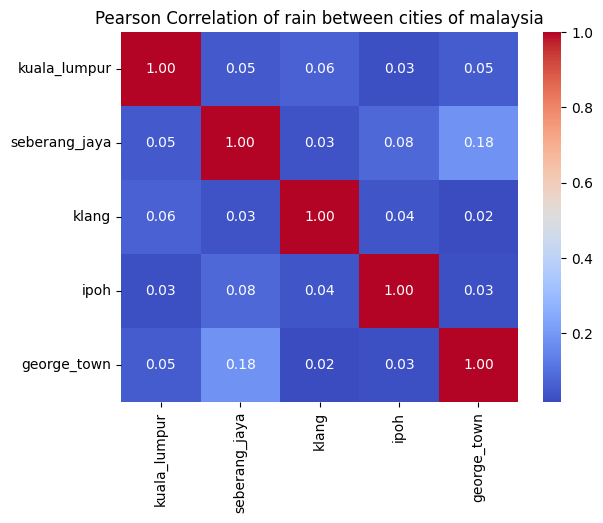

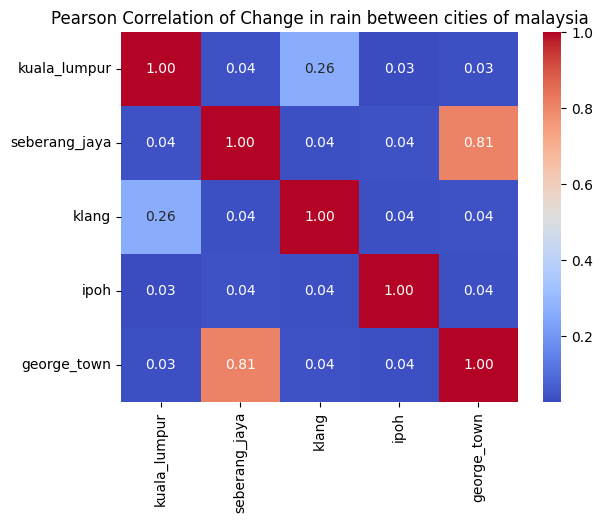

In [0]:
r1 = cor(malaysia,"rain","malaysia")
r2 = diff(malaysia,"rain","malaysia")

In [0]:
#slide(r1,"seberang_jaya")
#slide(r2,"seberang_jaya")

In [0]:
%sql
SELECT COUNT(*) FROM bangkok_new

count(1) 217368

In [0]:
phili = ["manila",
"quezon_city",
"zamboanga_city",
"davao",
"caloocan_city",
"cebu"]

plt.figure(figsize=(50,50))

for i,ele in enumerate(phili):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    #plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('phili.png') 
#plt.show()


manila
quezon_city
zamboanga_city
davao
caloocan_city
cebu


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

In [0]:
#r1 = cor(phili,"rain","phili")
#r2 = diff(phili,"rain","phili")

In [0]:
#comment out visualisation so i can export it

#slide(r1, "caloocan_city")
#slide(r2, "caloocan_city")

In [0]:
laos = [
    "vientiane",
"xiangkhoang",
"savannakhet",
"salavan",
]
plt.figure(figsize=(50,50))

for i,ele in enumerate(laos):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    #plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('laos.png') 
#plt.show()


vientiane
xiangkhoang


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

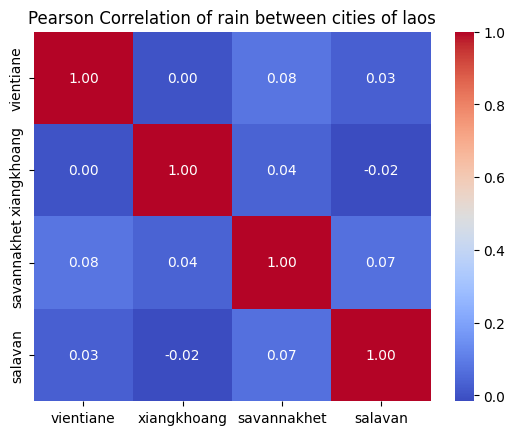

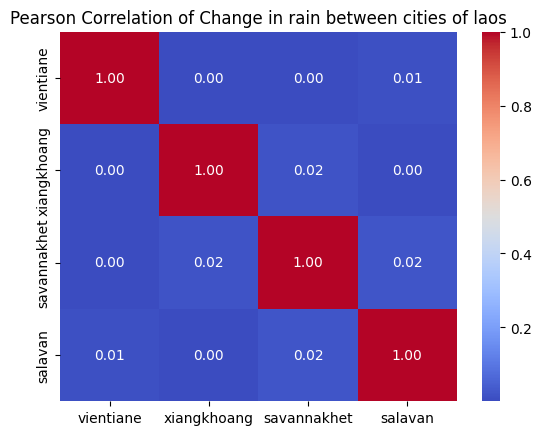

In [0]:
r1 = cor(laos,"rain","laos")
r2 = diff(laos,"rain","laos")

In [0]:
#slide(r1,"salavan")
#slide(r2,"salavan")

In [0]:
camb = ["phnom_penh",
"siem_reap",
"battambang",
"kampong_cham",
"sisophon"]


plt.figure(figsize=(50,50))

for i,ele in enumerate(camb):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('camb.png') 
plt.show()



phnom_penh
siem_reap
battambang
kampong_cham
sisophon


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

In [0]:
bru = [
    "Rangoon",
"Mandalay",
"nay_pyi_taw", 
"kyaukse",
"hpa_an",
]
plt.figure(figsize=(50,50))

for i,ele in enumerate(bru):
    print(ele)
    df = spark.sql(f"SELECT * FROM {ele}")
    df = df.toPandas()
    # display(df)
    plt.plot(df["date"], df["temperature_2m"].apply(lambda x: x + 30*i), label=ele)

plt.legend()
plt.savefig ('bru.png') 
plt.show()


com.databricks.backend.common.rpc.CommandSkippedException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:138)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:460)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:577)
	at com.data

In [0]:
v1 = cor(bru,"rain")
#sns.heatmap(v1.corr(), annot=True,cmap = 'coolwarm')
#plt.show()
#slide(v1,"Rangoon")
#plt.show()

com.databricks.backend.common.rpc.CommandSkippedException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:138)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:460)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:577)
	at com.data

In [0]:
v1 = change(bru,"rain")
#sns.heatmap(v1.corr(), annot=True,cmap = 'coolwarm')
#plt.show()
#slide(v1,"Rangoon")
#plt.show()

com.databricks.backend.common.rpc.CommandSkippedException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:138)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:460)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:577)
	at com.data

In [0]:
v1 = cor(bru,"wind_speed_10m")
#sns.heatmap(v1.corr(), annot=True,cmap = 'coolwarm')
#plt.show()
#slide(v1,"Rangoon")
#plt.show()

com.databricks.backend.common.rpc.CommandSkippedException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:138)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:460)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:577)
	at com.data